In [1]:
#nativos
import os
import unicodedata
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

#terceros
import pandas as pd
import numpy as np
import pymssql
import missingno as msnolistadconoce
from collections import Counter

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")


from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

now = datetime.now()
#ultimo_mes_cerrado =  datetime.strptime((now - relativedelta(months=1)).strftime('%Y-%m'), '%Y-%m').strftime('%Y-%m-%d')
#ultimo_mes_cerrado

In [2]:
from utils_alertas import *

EJEMPLO:
202104 mes cerrado de la cosecha de 202104 [202011, 202012, 202101, 202102, 202103, 202104] [202102, 202103, 202104] 
 historia 
 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104] 
 ---------------------------------------------------------------------------------------------------- 
 [202105, 202106] 
 ---------------------------------------------------------------------------------------------------- 
 [202005, 202006]
EJEMPLO:
202003 mes cerrado de la cosecha de 202003 [201910, 201911, 201912, 202001, 202002, 202003] [202001, 202002, 202003] 
 historia 
 [201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003] 
 ---------------------------------------------------------------------------------------------------- 
 [202004, 202005] 
 ---------------------------------------------------------------------------------------------------- 
 [201904, 201905]


In [3]:
import gc

In [4]:
try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )
import time
time.sleep(10)
gc.collect()

48

In [5]:
sql_visitame = """
    SELECT  * FROM(
    SELECT ROW_NUMBER() OVER(PARTITION BY COD_UNICO ORDER BY FECHA_VISITA DESC) ORDEN, *
    FROM STG.T_WEBBE_INFINITY_VISITA WITH (NOLOCK)
    ) A
    WHERE ORDEN = 1
"""

visitame = pd.read_sql(
   sql_visitame , connection_market
)
visitame.head(2)

,ORDEN,ID,COD_UNICO,FLG_CAMBIO_MIX_VENTAS,FLG_CAMBIO_PROCESO_INTEGRACION,FLG_CAMBIO_CONCENTRACION_VENTAS,FLG_CAMBIO_CONCENTRACION_PROVEEDORES,FLG_CAMBIO_OPERACIONES,FLG_CAMBIO_ZONA_CLIENTES,FLG_CAMBIO_GERENCIA_GENERAL,...,FLG_CAMBIO_BACKLOG,REVISION_FECHA,REVISION_USUARIO,FLG_CAMBIO_MODELO_NEGOCIO,CAMBIO_PRESTAMO_DESVIO,CAMBIO_INVERSION_ACTIVO_PATRIMONIO,FLG_PROCESO,FECHA_PROCESO,COMENTARIO_ROL_VALIDADOR,FECHA_CARGA
0,1,1069,0000006114,0,0,0,0,0,0,0,...,0,2021-02-05 16:17:09,B38015,0,None,None,NaN,NaT,Cliente mantiene 4 CF vencidas en posición (ma...,2021-06-01 13:01:00
1,1,1158,0000038026,0,0,0,0,0,0,0,...,0,NaT,None,0,None,None,NaN,NaT,None,2021-06-01 13:01:00


In [6]:
analisis_cliente = pd.read_csv("AVANCE_3.csv", dtype={'COD_UNICO': str, 'PERIODO': str, 'RUC': str})
print(analisis_cliente.shape)

analisis_cliente.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20,1657,1658,1661) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(24014, 1687)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.9,TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.8,TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.7,TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.6,TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.5,TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.4,TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.3,TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.2,TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.1,TIENE_COVER_IBK_GAR_AUTO_HIPO_IGUAL_0
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3,202008,0003980042,20101391397,0,COMERCIAL INDUSTRIAL DELTA,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
4,202008,0003290442,20100244129,1,AGRICOLA COMERCIAL E INDUSTRIAL,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
visitame.shape, visitame.groupby(by=['COD_UNICO']).size().shape

((930, 31), (930,))

In [8]:
analisis_cliente = analisis_cliente.merge(
    visitame[[col for col in visitame.columns if 'FLG_' in col] + ['COD_UNICO']], how='left', on=['COD_UNICO']
)
analisis_cliente.shape

(24014, 1702)

## >> FULL RCC

In [9]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass

#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )
import time
time.sleep(5)
gc.collect()

22

In [10]:
sql_full_rcc = """
SELECT  * FROM ODS.HD_VMVP_DETAIL_FULL_RCC_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
full_rcc = pd.read_sql(
   sql_full_rcc , connection_market
)
full_rcc.head()


pivoteo = pd.pivot_table(
    full_rcc, 
    values='MTOSALDO', index=['COD_UNICO'],columns=['NBR_ABREVIADO','PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().unstack(level=0)

pivoteo['listado'] = pivoteo.apply(lambda _: list(_), axis=1)
pivoteo['suma'] = pivoteo.sum(axis=1)

for col in [_ for _ in pivoteo.columns if _ not in ['suma', 'listado']]:
    pivoteo['MTO_DEUDA_FULL_RCC_' + col] = pivoteo[col].copy()
    pivoteo['PERCENT_DEUDA_FUL_RCC' + col] = pivoteo[col] / pivoteo['suma']
    del pivoteo[col]
    
pivoteo = pivoteo.reset_index()
pivoteo.head()

NBR_ABREVIADO,PERIODO,COD_UNICO,listado,suma,MTO_DEUDA_FULL_RCC_AGRO,PERCENT_DEUDA_FUL_RCCAGRO,MTO_DEUDA_FULL_RCC_BBVA,PERCENT_DEUDA_FUL_RCCBBVA,MTO_DEUDA_FULL_RCC_BCP,PERCENT_DEUDA_FUL_RCCBCP,...,MTO_DEUDA_FULL_RCC_MBCO,PERCENT_DEUDA_FUL_RCCMBCO,MTO_DEUDA_FULL_RCC_MITSUI,PERCENT_DEUDA_FUL_RCCMITSUI,MTO_DEUDA_FULL_RCC_NACION,PERCENT_DEUDA_FUL_RCCNACION,MTO_DEUDA_FULL_RCC_SANT,PERCENT_DEUDA_FUL_RCCSANT,MTO_DEUDA_FULL_RCC_SCOTIA,PERCENT_DEUDA_FUL_RCCSCOTIA
0,201906,0000002469,"[0.0, 0.0, 30704155.68, 0.0, 0.0, 0.0, 0.0, 0....",3.642580e+07,0.0,0.0,0.00,0.000000,3.070416e+07,0.842923,...,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.000000,0.00,0.000000
1,201906,0000003392,"[0.0, 10498421.97, 4384834.02, 0.0, 0.0, 0.0, ...",1.694368e+07,0.0,0.0,10498421.97,0.619607,4.384834e+06,0.258789,...,0.0,0.0,0.0,0.0,NaN,NaN,673361.58,0.039741,0.00,0.000000
2,201906,0000006114,"[0.0, 847.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",1.407983e+06,0.0,0.0,847.06,0.000602,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.000000,0.00,0.000000
3,201906,0000008045,"[0.0, 31095027.55, 112776015.74, 28624345.2, 0...",2.684693e+08,0.0,0.0,31095027.55,0.115823,1.127760e+08,0.420070,...,0.0,0.0,0.0,0.0,NaN,NaN,3505219.50,0.013056,24025551.91,0.089491
4,201906,0000008318,"[0.0, 1001413.48, 12836790.01, 2865961.06, 0.0...",1.717304e+07,0.0,0.0,1001413.48,0.058313,1.283679e+07,0.747497,...,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.000000,0.00,0.000000


In [11]:
pivoteo['NRO_ENTIDADES_FULL_RCC_SF'] = pivoteo['listado'].apply(lambda _: len([e for e in _ if e > 0]))
#pivoteo['NRO_ENTIDADES_FULL_RCC_SF'].hist()

pivoteo['PERIODO'] = pivoteo['PERIODO'].apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
pivoteo['PERIODO'].max(), pivoteo['PERIODO'].min()
del pivoteo['listado'] 

pivoteo['TMO_DEUDA_TOTAL_FULL_RCC_SF'] = pivoteo['suma']
del pivoteo['suma'] 

pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(24014, 1702)
(24014, 1752)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,MTO_DEUDA_FULL_RCC_MITSUI,PERCENT_DEUDA_FUL_RCCMITSUI,MTO_DEUDA_FULL_RCC_NACION,PERCENT_DEUDA_FUL_RCCNACION,MTO_DEUDA_FULL_RCC_SANT,PERCENT_DEUDA_FUL_RCCSANT,MTO_DEUDA_FULL_RCC_SCOTIA,PERCENT_DEUDA_FUL_RCCSCOTIA,NRO_ENTIDADES_FULL_RCC_SF,TMO_DEUDA_TOTAL_FULL_RCC_SF
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.000000,6126839.65,0.163714,3.0,37423991.97
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,3.0,5354690.38
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,0.0,0.0,0.0,0.0,10796228.58,0.112811,0.00,0.000000,7.0,95701498.47


In [12]:
acum = generate_listado_u3m(
    pivoteo, 'listados_num_entidades', values='NRO_ENTIDADES_FULL_RCC_SF',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)

def varacion_num_bancos(lista):
    hace_6_meses = round((lista[-7] + lista[-6]) / 2, 0)
    return lista[-1] - hace_6_meses
    
acum['VARACION_NUM_BANCOS_FULL_RCCC_SF']  = acum['listados_num_entidades'].apply(varacion_num_bancos)
#acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].hist()

acum['TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 1).astype(int)
acum['TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 1).astype(int)

acum['TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 2).astype(int)
acum['TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 2).astype(int)

acum['TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 3).astype(int)
acum['TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 3).astype(int)

del  acum['listados_num_entidades']

acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(3214, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(6428, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9642, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(12856, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(16070, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(19284, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(22498, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(25712, 3)
(24014, 1752)
(24014, 1759)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PERCENT_DEUDA_FUL_RCCSCOTIA,NRO_ENTIDADES_FULL_RCC_SF,TMO_DEUDA_TOTAL_FULL_RCC_SF,VARACION_NUM_BANCOS_FULL_RCCC_SF,TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,0.163714,3.0,37423991.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,0.000000,3.0,5354690.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,0.000000,7.0,95701498.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BBVA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BBVA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BBVA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_MENOR_MTOSALDO_BBVA_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)


analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BCP_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BCP_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BCP_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_MENOR_MTOSALDO_BCP_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)



analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BIF_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BIF_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BIF_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_MENOR_MTOSALDO_BIF_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)


analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_CAIDA_10PERCENT_MTOSALDO_SCOTIA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_CAIDA_20PERCENT_MTOSALDO_SCOTIA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_CAIDA_30PERCENT_MTOSALDO_SCOTIA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_MENOR_MTOSALDO_SCOTIA_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)



analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_U3M_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BIF',
    'MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BCP']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1).astype(int)

analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_U3M_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BIF',
    'MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BCP']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1).astype(int)


analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_U3M_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BIF',
    'MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BCP']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1).astype(int)


analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_U3M_BANK_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BCP',
    'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BIF']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1).astype(int)

def get_bank_no_ibk(_):
    if _[0] == 1:
        return 'BBVA'
    if _[1] == 1:
        return 'BCP'
    if _[2] == 1:
        return 'SCOTIA'
    if _[3] == 1:
        return 'BIF'
    
    return None

analisis_cliente['NOMBRE_BANCO_MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_U3M_BANK_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BCP',
    'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BIF']
].apply(lambda _: get_bank_no_ibk(_), axis=1)

In [14]:
analisis_cliente['NOMBRE_BANCO_MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_U3M_BANK_NO_IBK_SF'].value_counts(dropna=False)

NaN       19865
BBVA       1451
SCOTIA     1242
BCP        1096
BIF         360
Name: NOMBRE_BANCO_MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_U3M_BANK_NO_IBK_SF, dtype: int64

### PROTESTO

In [15]:
import gc

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )


import time
time.sleep(5)
gc.collect()

44

In [16]:
prot = """
    SELECT  * FROM ODS.HD_VMVP_PROTESTOS_SENTINEL_ALERTAS_CARTERA_BE WITH (NOLOCK)
    WHERE LEN(NRO_DOCUMENTO) = 11
"""
protesto = pd.read_sql(
   prot , connection_market
)

protesto['PERIODO'] = protesto['PERIODO'].astype(int)
#protesto = protesto[protesto['PERIODO'] >= 201811]
protesto['LEN_NRO_DOCUMENTO'] = protesto['NRO_DOCUMENTO'].apply(len)
protesto.head()

,NRO_DOCUMENTO,PERIODO,IMPORTE_VENCIDO,IMPORTE_TRIB,NRO_DOCS_TRIB,IMPORTE_PROT,NRO_DOCS_PROT,IMPORTE_LAB,NRO_DOCS_LAB,IMPORTE_IMPAG,NRO_DOCS_IMPAG,CANT_CTAS_CERRADAS,CANT_TARJ_ANULADAS,LEN_NRO_DOCUMENTO
0,20356883749,201909,0.00,0.0,0,0.00,0,0.00,0,0.00,0,0,0,11
1,20361022841,201909,0.00,0.0,0,0.00,0,0.00,0,0.00,0,0,0,11
2,20364212829,201909,21018672.44,636019.0,5,23629405.94,145,352910.39,84,219065.06,59,0,0,11
3,20372525496,201909,0.00,0.0,0,0.00,0,0.00,0,0.00,0,0,0,11
4,20376994466,201909,0.00,461950.0,2,0.00,0,0.00,0,1756.96,2,0,0,11


In [17]:
protesto.dtypes

NRO_DOCUMENTO          object
PERIODO                 int32
IMPORTE_VENCIDO       float64
IMPORTE_TRIB          float64
NRO_DOCS_TRIB           int64
IMPORTE_PROT          float64
NRO_DOCS_PROT           int64
IMPORTE_LAB           float64
NRO_DOCS_LAB            int64
IMPORTE_IMPAG         float64
NRO_DOCS_IMPAG          int64
CANT_CTAS_CERRADAS      int64
CANT_TARJ_ANULADAS      int64
LEN_NRO_DOCUMENTO       int64
dtype: object

In [18]:
datetime.now().year

2021

In [19]:
protesto['LEN_NRO_DOCUMENTO'].value_counts(dropna=False)

11    196498
Name: LEN_NRO_DOCUMENTO, dtype: int64

In [20]:
protesto['PERIODO'].min(), protesto['PERIODO'].max()

(201907, 202105)

In [21]:
def reemplza_con_previo(lista):
    if lista[0] == -1:
        return lista[1]
    
    return lista[0]

def get_monto_hist(lista, orden):
    try:
        return lista[orden]
    except:
        return 0
    
def searhc_zero(lista):
    meses = 0
    for val in lista[::-1]:
        if val <= 0:
            return meses
        meses += 1
    
    return meses

def searhc_no_zero(lista):
    meses = 0
    for val in lista[::-1]:
        if val > 0:
            return meses
        meses += 1
    
    return meses

In [22]:
cols_vars = [col for col in protesto.columns if 'IMPORTE' in col.upper() or 'NRO_' in col.upper()]

if 'PERIODO' in cols_vars:
    cols_vars.remove('PERIODO')
    
if 'NRO_DOCUMENTO' in cols_vars:
    cols_vars.remove('NRO_DOCUMENTO')
    
if 'IMPORTE_VENCIDO' in cols_vars:
    cols_vars.remove('IMPORTE_VENCIDO')
    
print(cols_vars)

['IMPORTE_TRIB', 'NRO_DOCS_TRIB', 'IMPORTE_PROT', 'NRO_DOCS_PROT', 'IMPORTE_LAB', 'NRO_DOCS_LAB', 'IMPORTE_IMPAG', 'NRO_DOCS_IMPAG', 'LEN_NRO_DOCUMENTO']


In [23]:
cols_vars

['IMPORTE_TRIB',
 'NRO_DOCS_TRIB',
 'IMPORTE_PROT',
 'NRO_DOCS_PROT',
 'IMPORTE_LAB',
 'NRO_DOCS_LAB',
 'IMPORTE_IMPAG',
 'NRO_DOCS_IMPAG',
 'LEN_NRO_DOCUMENTO']

In [24]:
for coll in cols_vars:
    ### ESTRUCTURA DE PREVIA
    print(coll)
    pivoteo = pd.pivot_table(
        protesto[['NRO_DOCUMENTO', 'PERIODO', coll]], 
        index=['NRO_DOCUMENTO'], columns=['PERIODO'], aggfunc=np.max, values=coll, fill_value=-1
    )
    columnas_pivoteo = sorted([int(_) for _ in pivoteo.columns])
    print(columnas_pivoteo)
    
    pivoteo = pivoteo[columnas_pivoteo]
    pivoteo.columns = [str(col) for col in pivoteo.columns]
    
    pivoteo['SUMA_VALID'] = pivoteo.sum(axis=1)
    pivoteo = pivoteo[pivoteo['SUMA_VALID'] > 0]
    del pivoteo['SUMA_VALID']
    columnas_pivoteo = sorted([int(_) for _ in pivoteo.columns])
    for col in list(pivoteo.columns)[:-11]:
        #print(col)
        pivoteo[col] = pivoteo[col].apply(lambda _: 0 if _ == -1 else _)
   

    #pivoteo.columns = sorted(pivoteo.columns)
    pivoteo = pivoteo.reset_index()
    
    
    ### AUTOCOMPLETADO CON EL MES ANTERIOR
    display(pivoteo.head(10))
    for ii, col in enumerate(columnas_pivoteo[1:], start=1):
        columna_previa = str(columnas_pivoteo[ii - 1])
        columna_actual = str(col)
        #print(ii, columna_actual, columna_previa)

        pivoteo[columna_actual] = pivoteo[[columna_actual, columna_previa]].apply(
            lambda _: reemplza_con_previo(_),
            axis=1
        )
    
    display(pivoteo.head(10))
    break

IMPORTE_TRIB
[201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105]


,NRO_DOCUMENTO,201907,201908,201909,201910,201911,201912,202001,202002,202003,...,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
0,20100002036,0.0,0.0,9020.0,9114.0,0.0,0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,20100008239,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,85295,85487.0,0.0,0.0,0.0,-1.0,-1.0
2,20100010136,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,4200.0,-1.0
3,20100010489,1633125.0,1716569.0,1752651.0,1772918.0,2094165.0,2132156,2132156.0,2038.0,9619.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,20100012856,0.0,0.0,746.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
5,20100016258,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,49846.0,60295.0,60429.0
6,20100020361,0.0,0.0,770.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,1013,0,0.0,0.0,0.0,0.0,0.0,-1.0
7,20100035121,0.0,0.0,1560.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,20100047056,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,49566,37009,23871,11642,0.0,0.0,0.0,0.0,-1.0,-1.0
9,20100063337,0.0,0.0,107634.0,2582.0,0.0,0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


,NRO_DOCUMENTO,201907,201908,201909,201910,201911,201912,202001,202002,202003,...,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
0,20100002036,0.0,0.0,9020.0,9114.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20100008239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,85295.0,85487.0,0.0,0.0,0.0,0.0,0.0
2,20100010136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4200.0,4200.0
3,20100010489,1633125.0,1716569.0,1752651.0,1772918.0,2094165.0,2132156.0,2132156.0,2038.0,9619.0,...,10620.0,10620.0,10620.0,10620.0,10620.0,10620.0,10620.0,10620.0,10620.0,10620.0
4,20100012856,0.0,0.0,746.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,20100016258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49846.0,60295.0,60429.0
6,20100020361,0.0,0.0,770.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,20100035121,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20100047056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49566.0,37009.0,23871.0,11642.0,0.0,0.0,0.0,0.0,0.0,0.0
9,20100063337,0.0,0.0,107634.0,2582.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:

pivoteo[pivoteo['NRO_DOCUMENTO'] == '20100002206'][['202004', '202005', '202006', '202007']]

,202004,202005,202006,202007


In [26]:
cols_vars

['IMPORTE_TRIB',
 'NRO_DOCS_TRIB',
 'IMPORTE_PROT',
 'NRO_DOCS_PROT',
 'IMPORTE_LAB',
 'NRO_DOCS_LAB',
 'IMPORTE_IMPAG',
 'NRO_DOCS_IMPAG',
 'LEN_NRO_DOCUMENTO']

In [27]:
#### RELEVANTE
def get_importe_sentinel_minimo(coll):
    if 'LAB' in coll:
        return 5000
    elif 'PROT' in coll:
        return 15000  
    elif 'TRIB' in coll:
        return 0  
    else:
        return 5000
    
    return 5000

In [28]:
for coll in cols_vars:
    #NRO_DOCS_TRIB 	IMPORTE_PROT 	NRO_DOCS_PROT 	IMPORTE_LAB 	NRO_DOCS_LAB 	IMPORTE_IMPAG 	NRO_DOCS_IMPAG 	CANT_CTAS_CERRADAS 	CANT_TARJ_ANULADAS
    
    ### ESTRUCTURA DE PREVIA
    print(coll)
    pivoteo = pd.pivot_table(
        protesto[['NRO_DOCUMENTO', 'PERIODO', coll]], 
        index=['NRO_DOCUMENTO'], columns=['PERIODO'], aggfunc=np.max, values=coll, fill_value=-1
    )
    columnas_pivoteo = sorted([int(_) for _ in pivoteo.columns])
    #print(columnas_pivoteo)
    pivoteo = pivoteo[columnas_pivoteo]
    pivoteo.columns = [str(col) for col in pivoteo.columns]

    
    ############################ AGREGADO
    pivoteo['SUMA_VALID'] = pivoteo.sum(axis=1)
    pivoteo = pivoteo[pivoteo['SUMA_VALID'] > 0]
    del pivoteo['SUMA_VALID']
    columnas_pivoteo = sorted([int(_) for _ in pivoteo.columns])
    for col in list(pivoteo.columns)[:12]:
        #print(col)
        pivoteo[col] = pivoteo[col].apply(lambda _: 0 if _ == -1 else _)
    ############################
    
    pivoteo = pivoteo.reset_index()
    
    ### AUTOCOMPLETADO CON EL MES ANTERIOR
    for ii, col in enumerate(columnas_pivoteo[1:], start=1):
        columna_previa = str(columnas_pivoteo[ii - 1])
        columna_actual = str(col)
        #print(ii, columna_actual, columna_previa)

        pivoteo[columna_actual] = pivoteo[[columna_actual, columna_previa]].apply(
            lambda _: reemplza_con_previo(_),
            axis=1
        )
    
    
    ### REORDENAMIENTO
    pivoteo = pd.melt(pivoteo, id_vars=['NRO_DOCUMENTO'], var_name='PERIODO', value_name=coll)
    pivoteo = pivoteo[pivoteo[coll] != -1]
    
    acum = generate_listado_u3m(
        pivoteo, 'listado', values=coll, index=['NRO_DOCUMENTO'], columns=['PERIODO'], aggfunc=max
    )
    del pivoteo
    #display(acum.head())
    print("#####################################################################################################")
    
    acum['{}_U1M'.format(coll)] = acum['listado'].apply(lambda _: _[-1])
    acum['{}_U6M'.format(coll)] = acum['listado'].apply(lambda _: get_monto_hist(_, -6))
    acum['{}_U12M'.format(coll)] = acum['listado'].apply(lambda _: get_monto_hist(_, -12))
    importe_minimo = get_importe_sentinel_minimo(coll)
    
    acum['{}_PROMEDIO_U6M'.format(coll)] = acum['listado'].apply(lambda _: 0 if _[-1] < importe_minimo else np.mean(_[-6:]))                                # relevante
    acum['{}_PROMEDIO_U9M'.format(coll)] = acum['listado'].apply(lambda _: 0 if _[-1] < importe_minimo else np.mean(_[-9:]))                                #relevante
    acum['TIENE_{}_REGISTRADO_MES_ACTUAL'.format(coll)] = acum['listado'].apply(lambda _: 0 if _[-1] < importe_minimo else 1).astype(int)                   #relevante
    
    if 'IMPORTE' in coll.upper():
        acum['{}_REGISTRADO_MAYOR_A_10MIL_SOLES'.format(coll)] = acum['listado'].apply(lambda _: _[-1] >= 10000).astype(int)
        acum['{}_REGISTRADO_MAYOR_A_5MIL_SOLES'.format(coll)] = acum['listado'].apply(lambda _: _[-1] >= 5000).astype(int)
        acum['{}_REGISTRADO_MAYOR_A_MIL_SOLES'.format(coll)] = acum['listado'].apply(lambda _: _[-1] >= 1000).astype(int)
        acum['{}_REGISTRADO_MAYOR_A_2.5MIL_SOLES'.format(coll)] = acum['listado'].apply(lambda _: _[-1] >= 2500).astype(int)
        acum['{}_REGISTRADO_MAYOR_A_7.5MIL_SOLES'.format(coll)] = acum['listado'].apply(lambda _: _[-1] >= 7500).astype(int)
        acum['{}_REGISTRADO_MAYOR_A_10MIL_SOLES'.format(coll)] = acum['listado'].apply(lambda _: _[-1] >= 10000).astype(int)
        acum['{}_REGISTRADO_MAYOR_A_15MIL_SOLES'.format(coll)] = acum['listado'].apply(lambda _: _[-1] >= 15000).astype(int)
        acum['{}_REGISTRADO_MAYOR_A_20MIL_SOLES'.format(coll)] = acum['listado'].apply(lambda _: _[-1] >= 20000).astype(int)
    
    acum['TENDENCIA_{}_U7M'.format(coll)] = acum['listado'].apply(lambda _: 0 if _[-1] < importe_minimo else np.polyfit(list(range(1, 8)), _[-7:], 1)[0])  #relevante
    acum['TENDENCIA_{}_U12M'.format(coll)] = acum['listado'].apply(lambda _: 0 if _[-1] < importe_minimo else np.polyfit(list(range(1, 13)), _[-12:], 1)[0])  #relevante
    
    acum['TIENE_TENDENCIA_CRECIENTE_{}_U7M'.format(coll)] = acum['TENDENCIA_{}_U7M'.format(coll)].apply(lambda _: _ > 0).astype(int)                       #relevante
    acum['TIENE_TENDENCIA_CRECIENTE_{}_U12M'.format(coll)] = acum['TENDENCIA_{}_U12M'.format(coll)].apply(lambda _: _ > 0).astype(int)                      #relevante
    
    
    acum['NRO_MESES_ANTERIORES_CON_{}_CONSECUTIVOS'.format(coll)] = acum['listado'].apply(lambda _: 0 if _[-1] < importe_minimo else searhc_zero(_))       #relevante                      
    acum['NRO_MESES_ANTERIORES_SIN_{}'.format(coll)] = acum['listado'].apply(lambda _: 0 if _[-1] < importe_minimo else searhc_no_zero(_))                 #relevante
    
    def div_simplee(a, b):
        if a == 0 and b == 0:
            return None
        elif b == 0:
            return 1
        
        return a / b
    
    acum['_{}_U1M_OVER_U12M'.format(coll)] = acum['listado'].apply(lambda _: div_simplee(np.mean([_[-12], _[-11]]), _[-1]))
    acum['TIENE_{}_U1M_OVER_U12M_MAYORIGUAL_1'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ >= 1).astype(int)
    acum['TIENE_{}_U1M_OVER_U12M_MAYOR_1'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ > 1).astype(int)
    acum['TIENE_{}_U1M_OVER_U12M_MAYORIGUAL_1.1'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ >= 1.1).astype(int)
    acum['TIENE_{}_U1M_OVER_U12M_MAYORIGUAL_1.2'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ >= 1.2).astype(int)
    acum['TIENE_{}_U1M_OVER_U12M_MAYORIGUAL_1.3'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ >= 1.3).astype(int)
    acum['TIENE_{}_U1M_OVER_U12M_MAYORIGUAL_1.4'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ >= 1.4).astype(int)
    acum['TIENE_{}_U1M_OVER_U12M_MAYORIGUAL_1.5'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ >= 1.5).astype(int)
    acum['TIENE_{}_U1M_OVER_U12M_MAYORIGUAL_1.6'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ >= 1.6).astype(int)
    acum['TIENE_{}_U1M_OVER_U12M_MAYORIGUAL_1.7'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ >= 1.7).astype(int)
    acum['TIENE_{}_U1M_OVER_U12M_MAYORIGUAL_1.8'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ >= 1.8).astype(int)
    acum['TIENE_{}_U1M_OVER_U12M_MAYORIGUAL_1.9'.format(coll)] = acum['_{}_U1M_OVER_U12M'.format(coll)].apply(lambda _: _ >= 1.9).astype(int)
    
    ### CRUCE
    del acum['listado']
    acum['RUC'] = acum['NRO_DOCUMENTO'].copy()
    del  acum['NRO_DOCUMENTO']
    acum['PERIODO'] = acum['PERIODO'].astype(str)
    acum['RUC'] = acum['RUC'].astype(str)
    
    print(analisis_cliente.shape)
    analisis_cliente = analisis_cliente.merge(
        acum, how='left', on=['PERIODO', 'RUC']
    )
    del acum
    print(analisis_cliente.shape)
    
    #display(acum.tail(20))

IMPORTE_TRIB
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(3758, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7516, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(11274, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(15032, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(18790, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(22548, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(26306, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(30064, 3)
#####################################################################

In [29]:
for column in [col for col in analisis_cliente.columns if 'IMPORTE_PROT' in col.upper()]:
    analisis_cliente[column.replace('IMPORTE_PROT', 'PROTESTOS')] = analisis_cliente[column].copy()

In [30]:
pd.crosstab(
    analisis_cliente['TIENE_IMPORTE_PROT_REGISTRADO_MES_ACTUAL'], analisis_cliente['PERIODO']
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
TIENE_IMPORTE_PROT_REGISTRADO_MES_ACTUAL,,,,,,,,
0.0,548,539,549,556,641,655,673,672
1.0,394,403,388,381,461,451,426,414


#### RELEVANTES

In [31]:
cols_related_protetso = [col for col in analisis_cliente.columns if '_PROTESTO' in col.upper()]
cols_related_protetso

['TIENE_PROTESTOS_REGISTRADO_MES_ACTUAL',
 'TENDENCIA_PROTESTOS_U7M',
 'TENDENCIA_PROTESTOS_U12M',
 'TIENE_TENDENCIA_CRECIENTE_PROTESTOS_U7M',
 'TIENE_TENDENCIA_CRECIENTE_PROTESTOS_U12M',
 'NRO_MESES_ANTERIORES_CON_PROTESTOS_CONSECUTIVOS',
 'NRO_MESES_ANTERIORES_SIN_PROTESTOS',
 '_PROTESTOS_U1M_OVER_U12M',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYORIGUAL_1',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYOR_1',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYORIGUAL_1.1',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYORIGUAL_1.2',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYORIGUAL_1.3',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYORIGUAL_1.4',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYORIGUAL_1.5',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYORIGUAL_1.6',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYORIGUAL_1.7',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYORIGUAL_1.8',
 'TIENE_PROTESTOS_U1M_OVER_U12M_MAYORIGUAL_1.9']

In [32]:
def div_simple(a, b):
    if pd.isnull(b) or b == 0:
        return 0
    
    return a / b

In [33]:
# Imputat clientes sin protestos registrados 
analisis_cliente['PROTESTOS_U1M'] = analisis_cliente['PROTESTOS_U1M'].fillna(0)
analisis_cliente['PROTESTOS_U6M'] = analisis_cliente['PROTESTOS_U6M'].fillna(0)
analisis_cliente['PROTESTOS_U12M'] = analisis_cliente['PROTESTOS_U12M'].fillna(0)

analisis_cliente['PERCENT_PROTESTO_U1M_OVER_DEUDA_TOTAL_RCC'] = analisis_cliente[['PROTESTOS_U1M', 'DEUDA_TOTAL_RCC']].apply(
    lambda _: div_simple(_[0], _[1]), axis=1
)

analisis_cliente[
    analisis_cliente['PERCENT_PROTESTO_U1M_OVER_DEUDA_TOTAL_RCC'] > 1
][['PROTESTOS_U1M', 'DEUDA_TOTAL_RCC']]

,PROTESTOS_U1M,DEUDA_TOTAL_RCC
537,790538.78,398988.58
936,1621677.14,836650.50
1022,7031.26,5164.35
1345,808011.72,376448.77
1463,1130651.51,700721.66
...,...,...
22528,785788.72,102.86
22825,347551.19,41443.80
22847,1559766.11,237178.86
23119,7275891.98,4997053.91


In [34]:
sufijo_nr = '_SIN_SEVERIDAD'

for column in cols_related_protetso:
    analisis_cliente[column + sufijo_nr] = analisis_cliente[column].copy()
    
    analisis_cliente[column] = analisis_cliente[[column, 'PROTESTOS_U1M', 'DEUDA_TOTAL_RCC']].apply(
        lambda _: 0 if _[1] / _[2] < 0.05 else _[0]
        , axis=1
    )    # Solo dejar

In [35]:
if 'listado' in analisis_cliente.columns:
    del analisis_cliente['listado']

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

import time
time.sleep(5)
gc.collect()

110

### RIESGO

In [36]:
riesgo_sql = """
    SELECT  * FROM ODS.HD_VMVP_SALDO_RIESGO_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""

riesgo = pd.read_sql(
   riesgo_sql , connection_market
)

riesgo['COD_UNICO'] = riesgo['CODUNICOCLI']
acum = generate_listado_u3m(
    riesgo, 'listado', values='RIESGO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(2603, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(5206, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(7809, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(10412, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(13015, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(15618, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(18221, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(20824, 3)


,COD_UNICO,listado,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202009
1,0000003392,"[82499.08036041666, 65966.83305, 52582.3542666...",202009
2,0000006114,"[12690.753314583333, 12855.786641666666, 10404...",202009
3,0000008045,"[735467.7666666667, 678783.5666666667, 289892....",202009
4,0000008318,"[30286.192775260417, 30073.088026302084, 29911...",202009


In [37]:
def get_percent_(lista, treshold):
    media_hace_7m =(lista[-7] + lista[-6]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_7m:
        return 1
    
    return ultimo_mes/media_hace_7m >= treshold

acum['TIENE_AUMENTO_RIESGO_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_1_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_RIESGO_3_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_RIESGO_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_20PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_RIESGO_30PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_RIESGO_40PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_RIESGO_50PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)
acum['TIENE_AUMENTO_RIESGO_60PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.6)).astype(int)
acum['TIENE_AUMENTO_RIESGO_70PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.7)).astype(int)

def get_percent_(lista, treshold):
    media_hace_3m =(lista[-2] + lista[-3]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_3m:
        return 1
    return ultimo_mes/media_hace_3m >= treshold

acum['TIENE_AUMENTO_RIESGO_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_1_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_RIESGO_3_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_RIESGO_5PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_20PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_RIESGO_30PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_RIESGO_40PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_RIESGO_50PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)

del acum['listado']
#acum.head()



acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)

(24014, 2075)
(24014, 2095)


In [38]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )


import time
time.sleep(5)
gc.collect()

22

In [39]:
saldo_producto = """
    SELECT  * FROM ODS.HD_VMVP_SALDOS_DIARIOS_PRODUTCOS_CARTERA_BE WITH (NOLOCK)
"""
colocacion = pd.read_sql(
   saldo_producto , connection_market
)
colocacion['COD_UNICO'] = colocacion['CODUNICOCLI']

acum = generate_listado_u3m(
    colocacion[colocacion['TIPOPRODUCTO'] == 'COL_DIRECTAS'], 'listado', values='SALDO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
def get_percent_(lista, treshold):
    media_hace_7m = max([lista[-7], lista[-6]]) 
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_7m:
        return 1
    
    return ultimo_mes/media_hace_7m >= treshold

acum['TIENE_AUMENTO_COL_DIRECTA_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_1_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_3_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_10PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_20PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_30PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_40PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_50PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_60PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.6)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_70PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.7)).astype(int)

def get_percent_(lista, treshold):
    media_hace_3m = max([lista[-2], lista[-3]]) 
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_3m:
        return 1
    return ultimo_mes/media_hace_3m >= treshold

acum['TIENE_AUMENTO_COL_DIRECTA_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_1_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_3_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_5PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_10PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_20PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_30PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_40PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_50PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)
acum['COL_DIRECTA_PROMEDIO_MENSUAL_U1M'] = acum['listado'].apply(lambda _: _[-1])
acum['COL_DIRECTA_PROMEDIO_MENSUAL_U3M'] = acum['listado'].apply(lambda _: _[-3])

acum['COL_DIRECTA_MES_ACTUAL'] =  acum['listado'].apply(lambda _: _[-1])
del acum['listado']

acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(2411, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(4822, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(7233, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(9644, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(12055, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(14466, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(16877, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(19288, 3)
(24014, 2095)
(24014, 2118)


In [40]:
acum = generate_listado_u3m(
    colocacion[colocacion['TIPOPRODUCTO'] == 'COL_INDIRECTAS'], 'listado', values='SALDO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)

def get_percent_(lista, treshold):
    media_hace_7m = max([lista[-7], lista[-6]]) 
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_7m:
        return 1
    
    return ultimo_mes/media_hace_7m >= treshold

acum['TIENE_AUMENTO_COL_INDIRECTA_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_1_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_3_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_10PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_20PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_30PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_40PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_50PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_60PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.6)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_70PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.7)).astype(int)

def get_percent_(lista, treshold):
    media_hace_3m = max([lista[-2] , lista[-3]]) 
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_3m:
        return 1
    return ultimo_mes/media_hace_3m >= treshold

acum['TIENE_AUMENTO_COL_INDIRECTA_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_1_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_3_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_5PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_10PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_20PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_30PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_40PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_50PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)

del acum['listado']

acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(922, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(1844, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(2766, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(3688, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(4610, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(5532, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(6454, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(7376, 3)
(24014, 2118)
(24014, 2138)


In [41]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )


import time
time.sleep(5)
gc.collect()

22

## PROVEEDORES

In [42]:
proveedores_sql = """
    SELECT  * FROM ODS.HD_VMVP_PAGOS_PROVEEDORES_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
proveedores = pd.read_sql(
   proveedores_sql , connection_market
)

#proveedores.head()


acum = generate_listado_u3m(
    proveedores, 'listado', values='VOLUMEN',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
#acum.head()

def get_percent_(lista, treshold):
    media_hace_7m =(lista[-7] + lista[-6]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not media_hace_7m:
        return 0
    
    return ultimo_mes/media_hace_7m <= treshold

acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.95)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_10PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.9)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_20PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.8)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_30PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.7)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_40PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.6)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_50PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.5)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_60PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.4)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.3)).astype(int)

def get_percent_(lista, treshold):
    media_hace_3m = (lista[-2] + lista[-3]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not media_hace_3m:
        return 0
    
    return ultimo_mes/media_hace_3m <= treshold

acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_5PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.95)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_10PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.9)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_20PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.8)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_30PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.7)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_40PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.6)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_50PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.5)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_60PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.4)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.3)).astype(int)

del acum['listado']
#acum.head()


acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(1171, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(2342, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(3513, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(4684, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(5855, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(7026, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(8197, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(9368, 3)
(24014, 2138)
(24014, 2156)


In [43]:
analisis_cliente.shape

(24014, 2156)

In [44]:
for column in [col for col in analisis_cliente.columns if 'listado' in  col.lower()]:
    del analisis_cliente[column]


In [45]:
analisis_cliente.shape

(24014, 2153)

### VPC

In [46]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )


import time
time.sleep(5)
gc.collect()

88

### >>>> DETALLE DE SEGUIR

In [47]:
sql_seguir = """
    SELECT * FROM ODS.HM_VMVP_VP_CLIENTE_FEVE_SEGUIR WITH (NOLOCK)
"""

seguir = pd.read_sql(
   sql_seguir , connection_market
)
print(seguir.shape)

acum = seguir[
    seguir['FEVE_SEGUIR'] == 1
].groupby(
    by=['PERIODO', 'DES_GRUPO_ECONOMICO']
).agg(
    {'NOMBRE_COMPLETO': list}
).reset_index()

acum.columns = ['PERIODO', 'DES_GRUPO_ECONOMICO', 'GRUPO_ECON_FEVE_SEGUIR']
#acum['GRUPO_ECON_FEVE_SEGUIR'] = acum['GRUPO_ECON_FEVE_SEGUIR'].apply(lambda _: ' // '.join(_))
acum.tail(10)

(12792, 4)


,PERIODO,DES_GRUPO_ECONOMICO,GRUPO_ECON_FEVE_SEGUIR
2575,202104,VURNBRAND,[RASH PERU]
2576,202104,WALSH PERU,[WALSH PERU SA INGENIEROS Y CIENTIFICOS C]
2577,202104,WAMA,[CORPORACION WAMA]
2578,202104,WAN XIN,[WAN XIN GROUP]
2579,202104,WENCO,[LINEA PLASTICA PERU]
2580,202104,WOLFENZON ZWILICH,[REPUESTOS NUEVOS]
2581,202104,YONS,[INVERSIONES YONS]
2582,202104,ZETRAMSA,[TRANSPORTES ZETRAMSA]
2583,202104,ZICSA,[ZICSA CONTRATISTAS GENERALES]
2584,202104,ZURECE,[IMPORTADORA Y DISTRIBUIDORA ZURECE]


In [48]:
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'DES_GRUPO_ECONOMICO']
)
analisis_cliente.shape

(24014, 2154)

In [49]:
cols_grupo_econ_seguir = [col for col in analisis_cliente.columns if 'GRUPO_ECON' in col.upper() and 'SEGUIR' in col.upper() and col != 'GRUPO_ECON_FEVE_SEGUIR']
cols_grupo_econ_seguir

['PERCENT_GRUPO_ECON_VPC_SEGUIR',
 'TIENE_1_O_MAS_GRUPO_ECON_VPC_SEGUIR',
 'TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR',
 'TIENE_3_O_MAS_GRUPO_ECON_VPC_SEGUIR',
 'TIENE_4_O_MAS_GRUPO_ECON_VPC_SEGUIR',
 'TIENE_5_O_MAS_GRUPO_ECON_VPC_SEGUIR',
 'TIENE_6_O_MAS_GRUPO_ECON_VPC_SEGUIR',
 'TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR',
 'TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR',
 'TIENE_30PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR']

In [50]:
analisis_cliente['TIENE_1_O_MAS_GRUPO_ECON_VPC_SEGUIR'].value_counts()

0.0    17168
1.0     4000
Name: TIENE_1_O_MAS_GRUPO_ECON_VPC_SEGUIR, dtype: int64

<AxesSubplot:>

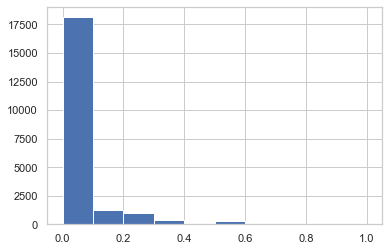

In [51]:
analisis_cliente['PERCENT_GRUPO_ECON_VPC_SEGUIR'].hist()

In [52]:
import ast
def validacion_inclusion(listado, name, col_analisis):
    try:
        if len(listado) == 1 and name == listado[0]:        ## SE descarta las alertas a todos los clientes que son los únicos de su grupo económico con FEVE SEGUIR
            return 0
    except:
        pass
    
    return col_analisis

In [53]:
for col in cols_grupo_econ_seguir:
    print(col)
    analisis_cliente[col] = analisis_cliente[['GRUPO_ECON_FEVE_SEGUIR', 'NOMBRE_COMPLETO', col]].apply(
        lambda _: validacion_inclusion(_[0], _[1], _[2]), axis=1
    ).fillna(0)

PERCENT_GRUPO_ECON_VPC_SEGUIR
TIENE_1_O_MAS_GRUPO_ECON_VPC_SEGUIR
TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR
TIENE_3_O_MAS_GRUPO_ECON_VPC_SEGUIR
TIENE_4_O_MAS_GRUPO_ECON_VPC_SEGUIR
TIENE_5_O_MAS_GRUPO_ECON_VPC_SEGUIR
TIENE_6_O_MAS_GRUPO_ECON_VPC_SEGUIR
TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR
TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR
TIENE_30PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR


In [54]:
analisis_cliente['TIENE_1_O_MAS_GRUPO_ECON_VPC_SEGUIR'].value_counts()

0.0    21886
1.0     2128
Name: TIENE_1_O_MAS_GRUPO_ECON_VPC_SEGUIR, dtype: int64

<AxesSubplot:>

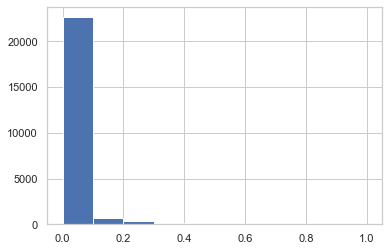

In [55]:
analisis_cliente['PERCENT_GRUPO_ECON_VPC_SEGUIR'].hist()

### >>>> DETALLE FEVE DURO

In [56]:
sql_duro = """
    SELECT  * FROM ODS.HM_VMVP_VP_CLIENTE_FEVE_DURO WITH (NOLOCK)
"""
duro = pd.read_sql(
   sql_duro , connection_market
)
print(duro.shape)

acum = duro[duro['FEVE_DURO'] == 1].groupby(by=['PERIODO', 'DES_GRUPO_ECONOMICO']).agg({'NOMBRE_COMPLETO': list}).reset_index()
acum.columns = ['PERIODO', 'DES_GRUPO_ECONOMICO', 'GRUPO_ECON_FEVE_DURO']
#acum['GRUPO_ECON_FEVE_DURO'] = acum['GRUPO_ECON_FEVE_DURO'].apply(lambda _: ' // '.join(_))
acum.head(10)

(13783, 4)


,PERIODO,DES_GRUPO_ECONOMICO,GRUPO_ECON_FEVE_DURO
0,202007,ABENGOA,[ABENGOA PERU]
1,202007,ACEROS DEL PERU,[ACEROS DEL PERU]
2,202007,ACHUY MAN,[HIDROCAMION]
3,202007,ACRUTA & TAPIA,"[ACRUTA & TAPIA INGENIEROS, CMO GROUP]"
4,202007,ANGULO ARAMBULO,[ENVIROEQUIP CONEXION ECOLOGICA]
5,202007,ANTICONA,[.LIDER]
6,202007,ARES,[CORPORACION ARES SERVICIOS GENERALES]
7,202007,ARGUMEDO,[A & R S A C CONTRATISTAS GENERALES]
8,202007,ARIMBORGO-CORONEL,[EL ARABE]
9,202007,ASAP CONSULTING GROUP,[ASAP CONSULTING GROUP]


In [57]:
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'DES_GRUPO_ECONOMICO']
)
analisis_cliente.shape

(24014, 2155)

### >>>> DETALLE CLASIICAION NO NORMAL

In [58]:
sql_no_normal = """
    SELECT  * FROM ODS.HM_VMVP_VP_CLIENTE_CLASIF_NO_NORMAL WITH (NOLOCK)
"""
no_normal = pd.read_sql(
   sql_no_normal , connection_market
)
print(no_normal.shape)

acum = no_normal[no_normal['NRO_CLASIF_NO_NORMAL'] == 1].groupby(by=['PERIODO', 'DES_GRUPO_ECONOMICO']).agg({'NOMBRE_COMPLETO': list}).reset_index()
acum.columns = ['PERIODO', 'DES_GRUPO_ECONOMICO', 'GRUPO_ECON_CLASIF_NO_NORMAL']
#acum['GRUPO_ECON_CLASIF_NO_NORMAL'] = acum['GRUPO_ECON_CLASIF_NO_NORMAL'].apply(lambda _: ' // '.join(_))
acum.head(10)

(1432, 4)


,PERIODO,DES_GRUPO_ECONOMICO,GRUPO_ECON_CLASIF_NO_NORMAL
0,202007,ABENGOA,[ABENGOA PERU]
1,202007,ACEROS DEL PERU,[ACEROS DEL PERU]
2,202007,ACS,[SOCIEDAD IBERICA DE CONSTRUCCIONES]
3,202007,ADL CORP,[CONTACTA TELECOMUNICACIONES]
4,202007,ALARCON,[SERVICIOS ALPA]
5,202007,ALL DRONES,[ALL 4 RACE]
6,202007,ALTRA,[CORPORACION SAPIA]
7,202007,AMAZ,[AMAZ]
8,202007,ANGULO ARAMBULO,[ENVIROEQUIP CONEXION ECOLOGICA]
9,202007,APSA,[APSA LTDA SUCURSAL DEL PERU]


In [59]:
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'DES_GRUPO_ECONOMICO']
)
analisis_cliente.shape

(24014, 2156)

## ADEX

In [60]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )


import time
time.sleep(5)
gc.collect()

22

In [61]:
query_adex = """
    SELECT * FROM ODS.HD_VMVP_ADEX_CARTERA_BE WITH (NOLOCK)
"""
adex = pd.read_sql(
   query_adex , connection_market
).sort_values(by=['PERIODO'], ascending=False)

adex.head(10)

,CODUNICOCLI,PERIODO,RUC,NOMBRE,VALOR,TIPO,CONTINENTE,SECTOR,FECHA_CARGA,NOMBRE_VPC
124153,0009767830,202103.0,20100060150,HERSIL S.A. LABORATORIOS INDUSTRIALES FARMACEU...,88541.038,IMP,ASIA,QUIMICO,2021-05-10 10:40:00,HERSIL
121023,0010404691,202103.0,20470407442,MUR - WY S.A.C.,179333.295,IMP,AMERICA DEL NORTE,METAL - MECANICO,2021-05-10 10:40:00,MUR WY
121037,0005381249,202103.0,20100287791,INSTITUTO QUIMIOTERAPICO S A,11730.778,IMP,AMERICA DEL NORTE,METAL - MECANICO,2021-05-10 10:40:00,INSTITUTO QUIMIOTERAPICO
121036,0005381249,202103.0,20100287791,INSTITUTO QUIMIOTERAPICO S A,31083.620,IMP,ASIA,SIDERURGICO Y METALURGICO,2021-05-10 10:40:00,INSTITUTO QUIMIOTERAPICO
121035,0005381249,202103.0,20100287791,INSTITUTO QUIMIOTERAPICO S A,176288.439,IMP,ASIA,QUIMICO,2021-05-10 10:40:00,INSTITUTO QUIMIOTERAPICO
121034,0005381249,202103.0,20100287791,INSTITUTO QUIMIOTERAPICO S A,45.000,EXP,EUROPA,MINERIA NO METALICA,2021-05-10 10:40:00,INSTITUTO QUIMIOTERAPICO
121033,0005381249,202103.0,20100287791,INSTITUTO QUIMIOTERAPICO S A,24482.050,EXP,AMERICA CENTRAL,QUIMICO,2021-05-10 10:40:00,INSTITUTO QUIMIOTERAPICO
121032,0010404691,202103.0,20470407442,MUR - WY S.A.C.,1521.041,IMP,AMERICA DEL NORTE,VARIOS,2021-05-10 10:40:00,MUR WY
121031,0010404691,202103.0,20470407442,MUR - WY S.A.C.,31762.155,IMP,ASIA,METAL - MECANICO,2021-05-10 10:40:00,MUR WY
121030,0010404691,202103.0,20470407442,MUR - WY S.A.C.,662.083,IMP,EUROPA,VARIOS,2021-05-10 10:40:00,MUR WY


In [62]:
adex['PERIODO'].max(), adex['PERIODO'].min()

(202103.0, 201501.0)

In [63]:
adex['PERIODO'] = adex['PERIODO'].astype(str).apply(lambda _: _.split('.')[0])
adex['PERIODO'] = adex['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
adex.head()

,CODUNICOCLI,PERIODO,RUC,NOMBRE,VALOR,TIPO,CONTINENTE,SECTOR,FECHA_CARGA,NOMBRE_VPC
124153,0009767830,202104,20100060150,HERSIL S.A. LABORATORIOS INDUSTRIALES FARMACEU...,88541.038,IMP,ASIA,QUIMICO,2021-05-10 10:40:00,HERSIL
121023,0010404691,202104,20470407442,MUR - WY S.A.C.,179333.295,IMP,AMERICA DEL NORTE,METAL - MECANICO,2021-05-10 10:40:00,MUR WY
121037,0005381249,202104,20100287791,INSTITUTO QUIMIOTERAPICO S A,11730.778,IMP,AMERICA DEL NORTE,METAL - MECANICO,2021-05-10 10:40:00,INSTITUTO QUIMIOTERAPICO
121036,0005381249,202104,20100287791,INSTITUTO QUIMIOTERAPICO S A,31083.620,IMP,ASIA,SIDERURGICO Y METALURGICO,2021-05-10 10:40:00,INSTITUTO QUIMIOTERAPICO
121035,0005381249,202104,20100287791,INSTITUTO QUIMIOTERAPICO S A,176288.439,IMP,ASIA,QUIMICO,2021-05-10 10:40:00,INSTITUTO QUIMIOTERAPICO


In [64]:
adex['PERIODO'].max(), adex['PERIODO'].min()

('202104', '201502')

### PIVOTEANDO

In [65]:
adex['COD_UNICO'] = adex['CODUNICOCLI']

pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['SECTOR', 'TIPO'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(tupla).replace(' ', '_') for tupla in pivoteo.columns]
pivoteo['TOTAL'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo['MTO_ADEX_' + col] = pivoteo[col].copy()
    pivoteo[col + '_PERCENT_ADEX'] = pivoteo[col] / pivoteo['TOTAL']
    del pivoteo[col]
    
for col in [_ for _ in pivoteo.columns if '_PERCENT' in _ and 'TOTAL' not in _.upper()]:
    print(col, end=' ')
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)

pivoteo.head()

AGRO_TRADICIONAL_EXP_PERCENT_ADEX AGRO_TRADICIONAL_IMP_PERCENT_ADEX AGROPECUARIO_Y_AGROINDUSTRIAS_EXP_PERCENT_ADEX AGROPECUARIO_Y_AGROINDUSTRIAS_IMP_PERCENT_ADEX MADERAS_EXP_PERCENT_ADEX MADERAS_IMP_PERCENT_ADEX METAL_-_MECANICO_EXP_PERCENT_ADEX METAL_-_MECANICO_IMP_PERCENT_ADEX MINERIA_NO_METALICA_EXP_PERCENT_ADEX MINERIA_NO_METALICA_IMP_PERCENT_ADEX MINERIA_TRADICIONAL_EXP_PERCENT_ADEX MINERIA_TRADICIONAL_IMP_PERCENT_ADEX PESCA_EXP_PERCENT_ADEX PESCA_IMP_PERCENT_ADEX PESCA_TRADICIONAL_EXP_PERCENT_ADEX PESCA_TRADICIONAL_IMP_PERCENT_ADEX PETROLEO_Y_GAS_NATURAL_EXP_PERCENT_ADEX PETROLEO_Y_GAS_NATURAL_IMP_PERCENT_ADEX PRENDAS_DE_VESTIR_EXP_PERCENT_ADEX PRENDAS_DE_VESTIR_IMP_PERCENT_ADEX QUIMICO_EXP_PERCENT_ADEX QUIMICO_IMP_PERCENT_ADEX SIDERURGICO_Y_METALURGICO_EXP_PERCENT_ADEX SIDERURGICO_Y_METALURGICO_IMP_PERCENT_ADEX TEXTIL_EXP_PERCENT_ADEX TEXTIL_IMP_PERCENT_ADEX VARIOS_EXP_PERCENT_ADEX VARIOS_IMP_PERCENT_ADEX 

MTO_ADEX_AGRO_TRADICIONAL_EXP  \
COD_UNICO  PERIODO                                  
0000002469 201503                             0.0   
           201504                             0.0   
           201505                             0.0   
           201507                             0.0   
           201508                             0.0   

                    AGRO_TRADICIONAL_EXP_PERCENT_ADEX  \
COD_UNICO  PERIODO                                      
0000002469 201503                                 0.0   
           201504                                 0.0   
           201505                                 0.0   
           201507                                 0.0   
           201508                                 0.0   

                    MTO_ADEX_AGRO_TRADICIONAL_IMP  \
COD_UNICO  PERIODO                                  
0000002469 201503                             0.0   
           201504                             0.0   
           201505                             0.0   
           201507                             0.0   
           201508                             0.0   

                    AGRO_TRADICIONAL_IMP_PERCENT_ADEX  \
COD_UNICO  PERIODO                                      
0000002469 201503                                 0.0   
           201504                                 0.0   
           201505                                 0.0   
           201507                                 0.0   
           201508                                 0.0   

                    MTO_ADEX_AGROPECUARIO_Y_AGROINDUSTRIAS_EXP  \
COD_UNICO  PERIODO                                               
0000002469 201503                                          0.0   
           201504                                          0.0   
           201505                                          0.0   
           201507                                          0.0   
           201508                                          0.0   

                    AGROPECUARIO_Y_AGROINDUSTRIAS_EXP_PERCENT_ADEX  \
COD_UNICO  PERIODO                                                   
0000002469 201503                                              0.0   
           201504                                              0.0   
           201505                                              0.0   
           201507                                              0.0   
           201508                                              0.0   

                    MTO_ADEX_AGROPECUARIO_Y_AGROINDUSTRIAS_IMP  \
COD_UNICO  PERIODO                                               
0000002469 201503                                          0.0   
           201504                                          0.0   
           201505                                          0.0   
           201507                                          0.0   
           201508                                          0.0   

                    AGROPECUARIO_Y_AGROINDUSTRIAS_IMP_PERCENT_ADEX  \
COD_UNICO  PERIODO                                                   
0000002469 201503                                              0.0   
           201504                                              0.0   
           201505                                              0.0   
           201507                                              0.0   
           201508                                              0.0   

                    MTO_ADEX_MADERAS_EXP  MADERAS_EXP_PERCENT_ADEX  ...  \
COD_UNICO  PERIODO                                                  ...   
0000002469 201503                    0.0                       0.0  ...   
           201504                    0.0                       0.0  ...   
           201505                    0.0                       0.0  ...   
           201507                    0.0                       0.0  ...   
           201508                    0.0                       0.0  ...   

                    PRENDAS_DE_VESTIR_EXP_

In [66]:
pivoteo = pivoteo.reset_index().fillna(0)

analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(24014, 2242)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PRENDAS_DE_VESTIR_EXP_ADEX,PRENDAS_DE_VESTIR_IMP_ADEX,QUIMICO_EXP_ADEX,QUIMICO_IMP_ADEX,SIDERURGICO_Y_METALURGICO_EXP_ADEX,SIDERURGICO_Y_METALURGICO_IMP_ADEX,TEXTIL_EXP_ADEX,TEXTIL_IMP_ADEX,VARIOS_EXP_ADEX,VARIOS_IMP_ADEX
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [67]:
pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['CONTINENTE', 'TIPO'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(tupla).replace(' ', '_') for tupla in pivoteo.columns]
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo['MTO_ADEX_' + col] = pivoteo[col].copy()
    pivoteo[col + '_PERCENT_ADEX'] = pivoteo[col] / pivoteo['total']
    del pivoteo[col]

for col in [_ for _ in pivoteo.columns if '_PERCENT' in _ and 'TOTAL' not in _.upper()]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)

pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.head()

,COD_UNICO,PERIODO,MTO_ADEX_AFRICA_EXP,AFRICA_EXP_PERCENT_ADEX,MTO_ADEX_AFRICA_IMP,AFRICA_IMP_PERCENT_ADEX,MTO_ADEX_AMERICA_CENTRAL_EXP,AMERICA_CENTRAL_EXP_PERCENT_ADEX,MTO_ADEX_AMERICA_CENTRAL_IMP,AMERICA_CENTRAL_IMP_PERCENT_ADEX,...,AMERICA_DEL_NORTE_EXP_ADEX,AMERICA_DEL_NORTE_IMP_ADEX,AMERICA_DEL_SUR_EXP_ADEX,AMERICA_DEL_SUR_IMP_ADEX,ASIA_EXP_ADEX,ASIA_IMP_ADEX,EUROPA_EXP_ADEX,EUROPA_IMP_ADEX,OCEANIA_EXP_ADEX,OCEANIA_IMP_ADEX
0,0000002469,201503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
1,0000002469,201504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0000002469,201505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0000002469,201507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,0000002469,201508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(24014, 2286)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,AMERICA_DEL_NORTE_EXP_ADEX,AMERICA_DEL_NORTE_IMP_ADEX,AMERICA_DEL_SUR_EXP_ADEX,AMERICA_DEL_SUR_IMP_ADEX,ASIA_EXP_ADEX,ASIA_IMP_ADEX,EUROPA_EXP_ADEX,EUROPA_IMP_ADEX,OCEANIA_EXP_ADEX,OCEANIA_IMP_ADEX
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [69]:
adex['COD_UNICO'] = adex['CODUNICOCLI']
pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['TIPO'], aggfunc=np.sum, fill_value=0
)

#pivoteo_grupo = pivoteo.reset_index()
pivoteo['TOTAL'] = pivoteo.sum(axis=1)
for col in pivoteo.columns:
    pivoteo['MTO_' + col + '_MES_ACTUAL'] = pivoteo[col].copy()
    pivoteo[col + '_PERCENT'] = pivoteo[col] / pivoteo['TOTAL']
    del pivoteo[col]
    
pivoteo.columns = [('ADEX_' + col).replace(' ', '_')  for col in pivoteo.columns]


for col in [_ for _ in pivoteo.columns if '_PERCENT' in _ and 'TOTAL' not in _.upper()]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)
    
pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.tail()

,COD_UNICO,PERIODO,ADEX_MTO_EXP_MES_ACTUAL,ADEX_EXP_PERCENT,ADEX_MTO_IMP_MES_ACTUAL,ADEX_IMP_PERCENT,ADEX_MTO_TOTAL_MES_ACTUAL,ADEX_TOTAL_PERCENT,TIENE_ADEX_EXP,TIENE_ADEX_IMP
88933,0017746563,202011,0.0,0.0,45338.890,1.0,45338.890,1.0,0,1
88934,0017746563,202101,0.0,0.0,34685.540,1.0,34685.540,1.0,0,1
88935,0017746563,202102,0.0,0.0,39247.400,1.0,39247.400,1.0,0,1
88936,0017746563,202103,0.0,0.0,103173.173,1.0,103173.173,1.0,0,1
88937,0017746563,202104,0.0,0.0,93597.847,1.0,93597.847,1.0,0,1


In [70]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(24014, 2294)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,OCEANIA_EXP_ADEX,OCEANIA_IMP_ADEX,ADEX_MTO_EXP_MES_ACTUAL,ADEX_EXP_PERCENT,ADEX_MTO_IMP_MES_ACTUAL,ADEX_IMP_PERCENT,ADEX_MTO_TOTAL_MES_ACTUAL,ADEX_TOTAL_PERCENT,TIENE_ADEX_EXP,TIENE_ADEX_IMP
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,0.0,0.0,0.0,0.0,255276.800,1.0,255276.800,1.0,0.0,1.0
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,0.0,0.0,0.0,0.0,88176.019,1.0,88176.019,1.0,0.0,1.0
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,0.0,0.0,0.0,0.0,501051.796,1.0,501051.796,1.0,0.0,1.0


In [71]:
analisis_cliente['TIENE_ADEX_EXP'].value_counts(dropna=False)

NaN    15160
0.0     5824
1.0     3030
Name: TIENE_ADEX_EXP, dtype: int64

In [72]:
gc.collect()
import time
time.sleep(5)

gc.collect()

0

In [73]:
pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO'], columns=['TIPO', 'PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['TIPO', 'PERIODO', 'COD_UNICO', 'VALOR']


pivoteo_grupo = pd.pivot_table(
    pivoteo, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['TIPO'], aggfunc=np.sum, fill_value=0
).reset_index()


del pivoteo
pivoteo_grupo.head()

TIPO,COD_UNICO,PERIODO,EXP,IMP
0,0000002469,201502,0.0,0.000
1,0000002469,201503,0.0,50604.826
2,0000002469,201504,0.0,432722.260
3,0000002469,201505,0.0,20405.910
4,0000002469,201506,0.0,0.000


In [74]:
for tramo in tramos:
    _3_meses_previos = tramo[1][:-2]
    print(tramo[0], _3_meses_previos, tramo[-1], tramo[-2])

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009] [202010, 202011] [201910, 201911]
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010] [202011, 202012] [201911, 201912]
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011] [202012, 202101] [201912, 202001]
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012] [202101, 202102] [202001, 202002]
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101] [202102, 202103] [202002, 202003]
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102] [202103, 202104] [202003, 202004]
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103] [202104, 202105] [202004, 202005]
202104 [202005, 202006, 202007, 20

In [75]:
contador = 1
dd = {k: list for k in pivoteo_grupo.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[1][:-2]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual
acum_3.head()

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(2061, 4)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(4122, 4)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6183, 4)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(8244, 4)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
////////////////////////////////////

,COD_UNICO,EXP,IMP,PERIODO
0,0000002469,"[66394.64, 47199.69, 15805.66, 50022.1, 95258....","[23794.48, 11023.43, 0.0, 39074.163, 0.0, 1465...",202009
1,0000003392,"[2437445.7800000003, 1122378.6800000002, 18916...","[0.0, 109071.433, 701995.0129999999, 5695.438,...",202009
2,0000006114,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 2463.763, 0.0, 0.0, ...",202009
3,0000008045,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5739593.367, 5547604.678999999, 3085338.49, 4...",202009
4,0000008318,"[0.0, 0.0, 0.0, 1840.218, 0.0, 0.0, 0.0, 0.0, ...","[74446.31, 98374.226, 41274.17999999999, 40945...",202009


In [76]:
acum_3['LEN_EXP'] = acum_3['EXP'].apply(len)
acum_3['LEN_EXP'].value_counts()

12    16488
Name: LEN_EXP, dtype: int64

In [77]:
acum_3[acum_3['LEN_EXP'] == 11]

,COD_UNICO,EXP,IMP,PERIODO,LEN_EXP


In [78]:
def smart_div(a, b, c):
    media_u12 = (a + b) / 2
    
    if media_u12 == 0:
        return 1
    
    return c / media_u12


def divv_simple(a, b):
    if b == 0:
        return 1
    return a / b
    

for col in ['EXP', 'IMP']:
    acum_3['ADEX_' + col + '_U2M'] = acum_3[col].apply(lambda _: _[-1]).fillna(0)
    acum_3['ADEX_' + col + '_U3M'] = acum_3[col].apply(lambda _: _[-2]).fillna(0)
    acum_3['ADEX_' + col + '_U4M'] = acum_3[col].apply(lambda _: _[-3]).fillna(0)
    acum_3['ADEX_' + col + '_U6M'] = acum_3[col].apply(lambda _: _[-5]).fillna(0)
    acum_3['ADEX_' + col + '_U7M'] = acum_3[col].apply(lambda _: _[-6]).fillna(0)
    acum_3['ADEX_' + col + '_U12M'] = acum_3[col].apply(lambda _: _[-11]).fillna(0)
    acum_3['ADEX_' + col + '_U13M'] = acum_3[col].apply(lambda _: _[-12]).fillna(0)
    
    acum_3['ADEX_U2M_OVER_U2M_' + col] = acum_3[['ADEX_' + col + '_U12M', 'ADEX_' + col + '_U13M', 'ADEX_' + col + '_U2M']].apply(lambda _: smart_div(_[0], _[1], _[2]), axis=1)
    acum_3['ADEX_U2M_OVER_U6M_' + col] = acum_3[['ADEX_' + col + '_U6M', 'ADEX_' + col + '_U7M', 'ADEX_' + col + '_U2M']].apply(lambda _: smart_div(_[0], _[1], _[2]), axis=1)
    acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_' + col] = acum_3[col].apply(lambda _: divv_simple(np.mean(_[-3:]), np.mean(_[-6:-3])))
    
    acum_3['ADEX_U2M_OVER_U2M_MENOR_1_' + col]  = acum_3['ADEX_U2M_OVER_U2M_' + col].apply(lambda _: _ < 1).astype(int)
    acum_3['ADEX_U2M_OVER_U2M_MENOR_0.95_' + col]  = acum_3['ADEX_U2M_OVER_U2M_' + col].apply(lambda _: _ < 0.95).astype(int)
    acum_3['ADEX_U2M_OVER_U2M_MENOR_0.85_' + col]  = acum_3['ADEX_U2M_OVER_U2M_' + col].apply(lambda _: _ < 0.85).astype(int)
    acum_3['ADEX_U2M_OVER_U2M_MENOR_0.75_' + col]  = acum_3['ADEX_U2M_OVER_U2M_' + col].apply(lambda _: _ < 0.75).astype(int)
    acum_3['ADEX_U2M_OVER_U2M_MENOR_0.65_' + col]  = acum_3['ADEX_U2M_OVER_U2M_' + col].apply(lambda _: _ < 0.65).astype(int)
    acum_3['ADEX_U2M_OVER_U2M_MENOR_0.55_' + col]  = acum_3['ADEX_U2M_OVER_U2M_' + col].apply(lambda _: _ < 0.55).astype(int)
    
    acum_3['ADEX_U2M_OVER_U6M_MENOR_1_' + col]  = acum_3['ADEX_U2M_OVER_U6M_' + col].apply(lambda _: _ < 1).astype(int)
    acum_3['ADEX_U2M_OVER_U6M_MENOR_0.95_' + col]  = acum_3['ADEX_U2M_OVER_U6M_' + col].apply(lambda _: _ < 0.95).astype(int)
    acum_3['ADEX_U2M_OVER_U6M_MENOR_0.85_' + col]  = acum_3['ADEX_U2M_OVER_U6M_' + col].apply(lambda _: _ < 0.85).astype(int)
    acum_3['ADEX_U2M_OVER_U6M_MENOR_0.75_' + col]  = acum_3['ADEX_U2M_OVER_U6M_' + col].apply(lambda _: _ < 0.75).astype(int)
    acum_3['ADEX_U2M_OVER_U6M_MENOR_0.65_' + col]  = acum_3['ADEX_U2M_OVER_U6M_' + col].apply(lambda _: _ < 0.65).astype(int)
    acum_3['ADEX_U2M_OVER_U6M_MENOR_0.55_' + col]  = acum_3['ADEX_U2M_OVER_U6M_' + col].apply(lambda _: _ < 0.55).astype(int)
    
    acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_MENOR_1_' + col]  = acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_' + col].apply(lambda _: _ < 1).astype(int)
    acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_MENOR_0.95_' + col]  = acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_' + col].apply(lambda _: _ < 0.95).astype(int)
    acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_MENOR_0.85_' + col]  = acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_' + col].apply(lambda _: _ < 0.85).astype(int)
    acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_MENOR_0.75_' + col]  = acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_' + col].apply(lambda _: _ < 0.75).astype(int)
    acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_MENOR_0.65_' + col]  = acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_' + col].apply(lambda _: _ < 0.65).astype(int)
    acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_MENOR_0.55_' + col]  = acum_3['ADEX_ULTTRIM_OVER_TRIMPASADO_' + col].apply(lambda _: _ < 0.55).astype(int)
    
    
    acum_3['ADEX_CAIDA_SEGUIDA_U3M_' + col] = acum_3[col].apply(
        lambda _: (_[-2] < _[-3] and _[-1] < _[-2]) or ( _[-1] < _[-3] and _[-2] == 0) or ( _[-1] < _[-2] and _[-3] == 0)).astype(int)
    acum_3['ADEX_CAIDA_20PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.8).astype(int)
    acum_3['ADEX_CAIDA_30PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.7).astype(int)
    acum_3['ADEX_CAIDA_40PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.6).astype(int)
    acum_3['ADEX_CAIDA_50PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.5).astype(int)
    
    
    acum_3['ADEX_SUBIDA_SEGUIDA_U3M_' + col] = acum_3[col].apply(lambda _: _[-2] > _[-3] and _[-1] > _[-2]).astype(int)
    acum_3['ADEX_MENOR_U3M_' +col] = acum_3[col].apply(lambda _: _[-1]  > 0 and _[-1] == min([mes for mes in _])).astype(int)
    acum_3['ADEX_MAYOR_U3M_' + col] = acum_3[col].apply(lambda _: _[-1] > _[-3] and _[-1] >= _[-2]).astype(int)
    acum_3['ADEX_NO__ESTE_MES_' + col] = acum_3[col].apply(lambda _: _[-1] < 100).astype(int)
    acum_3['ADEX_NO__U2M_' + col] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100).astype(int)
    acum_3['ADEX_NO__U3M_' + col] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100).astype(int)
    
    del acum_3[col]
acum_3.head()

,COD_UNICO,PERIODO,LEN_EXP,ADEX_EXP_U2M,ADEX_EXP_U3M,ADEX_EXP_U4M,ADEX_EXP_U6M,ADEX_EXP_U7M,ADEX_EXP_U12M,ADEX_EXP_U13M,...,ADEX_CAIDA_20PERCENT_MES_ANT_IMP,ADEX_CAIDA_30PERCENT_MES_ANT_IMP,ADEX_CAIDA_40PERCENT_MES_ANT_IMP,ADEX_CAIDA_50PERCENT_MES_ANT_IMP,ADEX_SUBIDA_SEGUIDA_U3M_IMP,ADEX_MENOR_U3M_IMP,ADEX_MAYOR_U3M_IMP,ADEX_NO__ESTE_MES_IMP,ADEX_NO__U2M_IMP,ADEX_NO__U3M_IMP
0,0000002469,202009,12,73938.55,89079.55,119842.18,78514.07,50220.55,47199.69,66394.64,...,0,0,0,0,0,0,1,0,0,0
1,0000003392,202009,12,6686787.78,822426.14,0.00,954979.04,1565642.99,1122378.68,2437445.78,...,0,0,0,0,0,0,0,0,0,0
2,0000006114,202009,12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,1,1,1
3,0000008045,202009,12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,1,0,0,0
4,0000008318,202009,12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,1,1,0,0,0,1,0,0


In [79]:
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
print(analisis_cliente.shape)
analisis_cliente.head(3)

(24014, 2294)
(24014, 2373)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ADEX_CAIDA_20PERCENT_MES_ANT_IMP,ADEX_CAIDA_30PERCENT_MES_ANT_IMP,ADEX_CAIDA_40PERCENT_MES_ANT_IMP,ADEX_CAIDA_50PERCENT_MES_ANT_IMP,ADEX_SUBIDA_SEGUIDA_U3M_IMP,ADEX_MENOR_U3M_IMP,ADEX_MAYOR_U3M_IMP,ADEX_NO__ESTE_MES_IMP,ADEX_NO__U2M_IMP,ADEX_NO__U3M_IMP
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ADEX COMPARACION AÑOS ANTERIORES

In [80]:
tramos_adex = []
for periodo_base in rango_general:
    
    rango_particular = [
        int(_.strftime('%Y%m')) for _ in list(
            pd.date_range((periodo_base - relativedelta(months=23)), (periodo_base + relativedelta(months=2)), freq='MS')
        )
    ]
    tramos_adex.append((
        int(periodo_base.strftime('%Y%m')),          #mes cerrado de la cosecha del mes siguiente
         rango_particular[-14:-2],  # listado 14 periodos sumando dos adelante y restando 11 periodos atras
         rango_particular[-28:-14]
    #     rango_particular[:2],     # 2 meses delante de la coasecha (año previo)
    #     rango_particular[-2:])    # 2 meses delante de la coasecha (año actual)
    ))

In [81]:
pivoteo_grupo['PERIODO'].max(), pivoteo_grupo['PERIODO'].min()

('202104', '201502')

In [82]:
#for tramo in tramos_adex:
#    print(tramo[0], tramo[1], tramo[2])

In [83]:
contador = 1
dd = {k: list for k in pivoteo_grupo.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos_adex:
    print(tramo[0], tramo[1], tramo[2])
    
    _12_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(tramo[1])].groupby(by=['COD_UNICO']).agg(dd)
    _12_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _12_actual.columns]
    
    _12_pasado = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(tramo[2])].groupby(by=['COD_UNICO']).agg(dd)
    _12_pasado.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _12_pasado.columns]
    
    print("/"*100)
    
    _12_actual = _12_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _12_actual['PERIODO'] = tramo[0]
    
    _12_pasado = _12_pasado.reset_index().rename(columns={'index': 'COD_UNICO'})
    _12_pasado['PERIODO'] = tramo[0]

    if contador == 1:
        acum_12_actual = _12_actual.copy()
        acum_12_pasado = _12_pasado.copy()
    else:
        acum_12_actual = pd.concat(
            [acum_12_actual, _12_actual], axis=0
        )
        acum_12_pasado = pd.concat(
            [acum_12_pasado, _12_pasado], axis=0
        )
        
    print(acum_12_actual.shape, acum_12_pasado.shape)
    contador +=1
    del _12_actual
    del _12_pasado

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009] [201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909]
////////////////////////////////////////////////////////////////////////////////////////////////////
(2061, 4) (2061, 4)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010] [201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910]
////////////////////////////////////////////////////////////////////////////////////////////////////
(4122, 4) (4122, 4)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011] [201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6183, 4) (6183, 4)
202012 [202001, 202002, 202003, 20

In [84]:
acum_12_actual.head()

,COD_UNICO,EXP,IMP,PERIODO
0,0000002469,"[66394.64, 47199.69, 15805.66, 50022.1, 95258....","[23794.48, 11023.43, 0.0, 39074.163, 0.0, 1465...",202009
1,0000003392,"[2437445.7800000003, 1122378.6800000002, 18916...","[0.0, 109071.433, 701995.0129999999, 5695.438,...",202009
2,0000006114,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 2463.763, 0.0, 0.0, ...",202009
3,0000008045,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5739593.367, 5547604.678999999, 3085338.49, 4...",202009
4,0000008318,"[0.0, 0.0, 0.0, 1840.218, 0.0, 0.0, 0.0, 0.0, ...","[74446.31, 98374.226, 41274.17999999999, 40945...",202009


In [85]:
acum_12_pasado.head()

,COD_UNICO,EXP,IMP,PERIODO
0,0000002469,"[49257.43, 67153.0, 50537.22, 81897.63, 32290....","[4589.724, 0.0, 33465.106, 19719.042, 2593.68,...",202009
1,0000003392,"[2036456.31, 210668.16, 1100041.6400000001, 16...","[7936.03, 69294.8, 56325.602999999996, 6168.59...",202009
2,0000006114,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202009
3,0000008045,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3373012.102, 4373021.546, 6382955.791999999, ...",202009
4,0000008318,"[0.0, 0.0, 0.0, 0.0, 0.0, 4616.264, 0.0, 0.0, ...","[78677.04999999999, 23356.218, 64558.549, 1443...",202009


In [86]:
acum_12_actual.shape, acum_12_pasado.shape

((18549, 4), (18549, 4))

In [87]:
for col in ['EXP', 'IMP']:
    acum_12_actual['ADEX_PROM_U12M_ACTUAL_' + col] = acum_12_actual[col].apply(np.mean)
    acum_12_actual['ADEX_MAX_U12M_ACTUAL_' + col] = acum_12_actual[col].apply(np.max)
    acum_12_actual['ADEX_MIN_U12M_ACTUAL_' + col] = acum_12_actual[col].apply(np.min)
    
    acum_12_actual['ADEX_PROM_U6M_ACTUAL_' + col] = acum_12_actual[col].apply(lambda _: np.mean(_[-6:]))
    acum_12_actual['ADEX_MAX_U6M_ACTUAL_' + col] = acum_12_actual[col].apply(lambda _: np.max(_[-6:]))
    acum_12_actual['ADEX_MIN_U6M_ACTUAL_' + col] = acum_12_actual[col].apply(lambda _: np.min(_[-6:]))
    
    acum_12_actual['ADEX_PROM_U3M_ACTUAL_' + col] = acum_12_actual[col].apply(lambda _: np.mean(_[-3:]))
    acum_12_actual['ADEX_MAX_U3M_ACTUAL_' + col] = acum_12_actual[col].apply(lambda _: np.max(_[-3:]))
    acum_12_actual['ADEX_MIN_U3M_ACTUAL_' + col] = acum_12_actual[col].apply(lambda _: np.min(_[-3:]))
    
    del acum_12_actual[col]

acum_12_actual.head()

,COD_UNICO,PERIODO,ADEX_PROM_U12M_ACTUAL_EXP,ADEX_MAX_U12M_ACTUAL_EXP,ADEX_MIN_U12M_ACTUAL_EXP,ADEX_PROM_U6M_ACTUAL_EXP,ADEX_MAX_U6M_ACTUAL_EXP,ADEX_MIN_U6M_ACTUAL_EXP,ADEX_PROM_U3M_ACTUAL_EXP,ADEX_MAX_U3M_ACTUAL_EXP,ADEX_MIN_U3M_ACTUAL_EXP,ADEX_PROM_U12M_ACTUAL_IMP,ADEX_MAX_U12M_ACTUAL_IMP,ADEX_MIN_U12M_ACTUAL_IMP,ADEX_PROM_U6M_ACTUAL_IMP,ADEX_MAX_U6M_ACTUAL_IMP,ADEX_MIN_U6M_ACTUAL_IMP,ADEX_PROM_U3M_ACTUAL_IMP,ADEX_MAX_U3M_ACTUAL_IMP,ADEX_MIN_U3M_ACTUAL_IMP
0,0000002469,202009,8.632758e+04,204309.560,15805.66,1.026507e+05,204309.56,50220.55,9.428676e+04,119842.18,73938.55,1.663335e+04,48677.003,0.000,1.850933e+04,48677.003,0.000,2.892208e+04,48677.003,6436.790
1,0000003392,202009,1.802873e+06,6686787.780,0.00,1.746035e+06,6686787.78,0.00,2.503071e+06,6686787.78,0.00,2.585547e+05,1421132.103,0.000,3.736970e+05,1421132.103,17972.808,2.328067e+05,660478.363,17972.808
2,0000006114,202009,0.000000e+00,0.000,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,0.00,2.053136e+02,2463.763,0.000,0.000000e+00,0.000,0.000,0.000000e+00,0.000,0.000
3,0000008045,202009,0.000000e+00,0.000,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,0.00,3.161187e+06,5739593.367,803695.797,2.006269e+06,3200784.828,803695.797,1.818998e+06,2758767.369,803695.797
4,0000008318,202009,1.533515e+02,1840.218,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,0.00,5.642669e+04,126188.429,0.000,3.578462e+04,126188.429,0.000,5.704717e+04,126188.429,0.000


In [88]:
for col in ['EXP', 'IMP']:
    acum_12_pasado['ADEX_PROM_U12M_PASADO_' + col] = acum_12_pasado[col].apply(np.mean)
    acum_12_pasado['ADEX_MAX_U12M_PASADO_' + col] = acum_12_pasado[col].apply(np.max)
    acum_12_pasado['ADEX_MIN_U12M_PASADO_' + col] = acum_12_pasado[col].apply(np.min)
    
    acum_12_pasado['ADEX_PROM_U6M_PASADO_' + col] = acum_12_pasado[col].apply(lambda _: np.mean(_[-6:]))
    acum_12_pasado['ADEX_MAX_U6M_PASADO_' + col] = acum_12_pasado[col].apply(lambda _: np.max(_[-6:]))
    acum_12_pasado['ADEX_MIN_U6M_PASADO_' + col] = acum_12_pasado[col].apply(lambda _: np.min(_[-6:]))
    
    acum_12_pasado['ADEX_PROM_U3M_PASADO_' + col] = acum_12_pasado[col].apply(lambda _: np.mean(_[-3:]))
    acum_12_pasado['ADEX_MAX_U3M_PASADO_' + col] = acum_12_pasado[col].apply(lambda _: np.max(_[-3:]))
    acum_12_pasado['ADEX_MIN_U3M_PASADO_' + col] = acum_12_pasado[col].apply(lambda _: np.min(_[-3:]))
    
    del acum_12_pasado[col]

acum_12_pasado.head()

,COD_UNICO,PERIODO,ADEX_PROM_U12M_PASADO_EXP,ADEX_MAX_U12M_PASADO_EXP,ADEX_MIN_U12M_PASADO_EXP,ADEX_PROM_U6M_PASADO_EXP,ADEX_MAX_U6M_PASADO_EXP,ADEX_MIN_U6M_PASADO_EXP,ADEX_PROM_U3M_PASADO_EXP,ADEX_MAX_U3M_PASADO_EXP,ADEX_MIN_U3M_PASADO_EXP,ADEX_PROM_U12M_PASADO_IMP,ADEX_MAX_U12M_PASADO_IMP,ADEX_MIN_U12M_PASADO_IMP,ADEX_PROM_U6M_PASADO_IMP,ADEX_MAX_U6M_PASADO_IMP,ADEX_MIN_U6M_PASADO_IMP,ADEX_PROM_U3M_PASADO_IMP,ADEX_MAX_U3M_PASADO_IMP,ADEX_MIN_U3M_PASADO_IMP
0,0000002469,202009,6.180678e+04,95680.700,32290.84,6.558762e+04,95680.70,37491.02,6.256567e+04,82993.81,37491.02,1.392808e+04,33465.106,0.000,1.546501e+04,31747.700,0.000,1.065174e+04,26271.597,0.000
1,0000003392,202009,2.169012e+06,3326793.640,210668.16,2.879893e+06,3326793.64,2308999.71,3.078878e+06,3326793.64,2619865.95,4.044759e+04,131093.790,0.000,2.548625e+04,64187.019,0.000,3.378840e+04,64187.019,0.000
2,0000006114,202009,0.000000e+00,0.000,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,0.00,2.540833e+03,30490.000,0.000,5.081667e+03,30490.000,0.000,1.016333e+04,30490.000,0.000
3,0000008045,202009,0.000000e+00,0.000,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,0.00,4.395594e+06,8128076.492,2124110.794,3.162418e+06,4572565.130,2124110.794,3.935377e+06,4572565.130,3126843.884
4,0000008318,202009,3.846887e+02,4616.264,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,0.00,9.696727e+04,201892.079,23356.218,1.254870e+05,201892.079,58150.081,9.445244e+04,149659.898,58150.081


In [89]:
acum_12_actual.shape, acum_12_pasado.shape

((18549, 20), (18549, 20))

In [90]:
acum_12_actual = acum_12_actual.merge(
    acum_12_pasado, how='left', on=['COD_UNICO', 'PERIODO']
)
acum_12_actual.shape

(18549, 38)

In [91]:
print([_ for _ in acum_12_pasado.columns if _ not in ['COD_UNICO', 'PERIODO']])

['ADEX_PROM_U12M_PASADO_EXP', 'ADEX_MAX_U12M_PASADO_EXP', 'ADEX_MIN_U12M_PASADO_EXP', 'ADEX_PROM_U6M_PASADO_EXP', 'ADEX_MAX_U6M_PASADO_EXP', 'ADEX_MIN_U6M_PASADO_EXP', 'ADEX_PROM_U3M_PASADO_EXP', 'ADEX_MAX_U3M_PASADO_EXP', 'ADEX_MIN_U3M_PASADO_EXP', 'ADEX_PROM_U12M_PASADO_IMP', 'ADEX_MAX_U12M_PASADO_IMP', 'ADEX_MIN_U12M_PASADO_IMP', 'ADEX_PROM_U6M_PASADO_IMP', 'ADEX_MAX_U6M_PASADO_IMP', 'ADEX_MIN_U6M_PASADO_IMP', 'ADEX_PROM_U3M_PASADO_IMP', 'ADEX_MAX_U3M_PASADO_IMP', 'ADEX_MIN_U3M_PASADO_IMP']


In [92]:
for col in [_ for _ in acum_12_pasado.columns if _ not in ['COD_UNICO', 'PERIODO']]:
    print(col, col.replace('PASADO', 'ACTUAL'))
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'] = acum_12_actual[[col.replace('PASADO', 'ACTUAL'), col]].apply(
        lambda _: divv_simple(_[0], _[1]), axis=1
    )
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_1'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 1).astype(int)
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_0.9'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 0.9).astype(int)
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_0.8'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 0.8).astype(int)
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_0.7'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 0.7).astype(int)
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_0.6'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 0.6).astype(int)
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_0.5'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 0.5).astype(int)
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_0.4'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 0.4).astype(int)
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_0.3'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 0.3).astype(int)
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_0.2'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 0.2).astype(int)
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_0.1'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 0.1).astype(int)
    acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO_MENOR_0.55'] =  acum_12_actual[col.replace('PASADO', 'ACTUAL') + '_OVER_12M_PASADO'].apply(lambda _: _< 0.55).astype(int)

ADEX_PROM_U12M_PASADO_EXP ADEX_PROM_U12M_ACTUAL_EXP
ADEX_MAX_U12M_PASADO_EXP ADEX_MAX_U12M_ACTUAL_EXP
ADEX_MIN_U12M_PASADO_EXP ADEX_MIN_U12M_ACTUAL_EXP
ADEX_PROM_U6M_PASADO_EXP ADEX_PROM_U6M_ACTUAL_EXP
ADEX_MAX_U6M_PASADO_EXP ADEX_MAX_U6M_ACTUAL_EXP
ADEX_MIN_U6M_PASADO_EXP ADEX_MIN_U6M_ACTUAL_EXP
ADEX_PROM_U3M_PASADO_EXP ADEX_PROM_U3M_ACTUAL_EXP
ADEX_MAX_U3M_PASADO_EXP ADEX_MAX_U3M_ACTUAL_EXP
ADEX_MIN_U3M_PASADO_EXP ADEX_MIN_U3M_ACTUAL_EXP
ADEX_PROM_U12M_PASADO_IMP ADEX_PROM_U12M_ACTUAL_IMP
ADEX_MAX_U12M_PASADO_IMP ADEX_MAX_U12M_ACTUAL_IMP
ADEX_MIN_U12M_PASADO_IMP ADEX_MIN_U12M_ACTUAL_IMP
ADEX_PROM_U6M_PASADO_IMP ADEX_PROM_U6M_ACTUAL_IMP
ADEX_MAX_U6M_PASADO_IMP ADEX_MAX_U6M_ACTUAL_IMP
ADEX_MIN_U6M_PASADO_IMP ADEX_MIN_U6M_ACTUAL_IMP
ADEX_PROM_U3M_PASADO_IMP ADEX_PROM_U3M_ACTUAL_IMP
ADEX_MAX_U3M_PASADO_IMP ADEX_MAX_U3M_ACTUAL_IMP
ADEX_MIN_U3M_PASADO_IMP ADEX_MIN_U3M_ACTUAL_IMP


In [93]:
acum_12_actual['ADEX_MAX_U6M_ACTUAL_EXP_OVER_12M_PASADO_MENOR_0.4'].value_counts(dropna=False)

0    15923
1     2626
Name: ADEX_MAX_U6M_ACTUAL_EXP_OVER_12M_PASADO_MENOR_0.4, dtype: int64

In [94]:
acum_12_actual.shape, acum_12_actual.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((18549, 254), (18549,))

In [95]:
acum_12_actual['PERIODO'] = acum_12_actual['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum_12_actual, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_12_actual
print(analisis_cliente.shape)
analisis_cliente.head(3)

(24014, 2373)
(24014, 2625)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.9,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.8,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.7,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.6,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.5,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.4,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.3,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.2,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.1,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.55
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
analisis_cliente.to_csv("AVANCE_4.csv", index=False)

In [97]:
analisis_cliente['PERIODO'].value_counts(dropna=False)

202103    2903
202102    2900
202101    2892
202104    2890
202010    2507
202012    2501
202009    2499
202011    2494
202008    2428
Name: PERIODO, dtype: int64

In [98]:
analisis_cliente.shape

(24014, 2625)

In [99]:
[col for col in analisis_cliente.columns if 'IMPORTE_PROT' in col]

['IMPORTE_PROT_U1M',
 'IMPORTE_PROT_U6M',
 'IMPORTE_PROT_U12M',
 'IMPORTE_PROT_PROMEDIO_U6M',
 'IMPORTE_PROT_PROMEDIO_U9M',
 'TIENE_IMPORTE_PROT_REGISTRADO_MES_ACTUAL',
 'IMPORTE_PROT_REGISTRADO_MAYOR_A_10MIL_SOLES',
 'IMPORTE_PROT_REGISTRADO_MAYOR_A_5MIL_SOLES',
 'IMPORTE_PROT_REGISTRADO_MAYOR_A_MIL_SOLES',
 'IMPORTE_PROT_REGISTRADO_MAYOR_A_2.5MIL_SOLES',
 'IMPORTE_PROT_REGISTRADO_MAYOR_A_7.5MIL_SOLES',
 'IMPORTE_PROT_REGISTRADO_MAYOR_A_15MIL_SOLES',
 'IMPORTE_PROT_REGISTRADO_MAYOR_A_20MIL_SOLES',
 'TENDENCIA_IMPORTE_PROT_U7M',
 'TENDENCIA_IMPORTE_PROT_U12M',
 'TIENE_TENDENCIA_CRECIENTE_IMPORTE_PROT_U7M',
 'TIENE_TENDENCIA_CRECIENTE_IMPORTE_PROT_U12M',
 'NRO_MESES_ANTERIORES_CON_IMPORTE_PROT_CONSECUTIVOS',
 'NRO_MESES_ANTERIORES_SIN_IMPORTE_PROT',
 '_IMPORTE_PROT_U1M_OVER_U12M',
 'TIENE_IMPORTE_PROT_U1M_OVER_U12M_MAYORIGUAL_1',
 'TIENE_IMPORTE_PROT_U1M_OVER_U12M_MAYOR_1',
 'TIENE_IMPORTE_PROT_U1M_OVER_U12M_MAYORIGUAL_1.1',
 'TIENE_IMPORTE_PROT_U1M_OVER_U12M_MAYORIGUAL_1.2',
 'TIENE_IM

In [100]:
analisis_cliente[
    (analisis_cliente['IMPORTE_PROT_U1M'] > 0) & (analisis_cliente['ZONAL'].isin(['BEP ZONAL 1']))
]

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.9,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.8,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.7,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.6,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.5,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.4,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.3,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.2,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.1,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.55
429,202009,0011872710,20440424792,1,POSTES DEL NORTE,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,202009,0012440162,20544093895,0,ENTRETENIMIENTOS MASARIS,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
480,202009,0012376680,20531524579,0,INDUAMERICA TRADE,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,202009,0012081965,20446352912,0,COMERCIAL ARAUJO E HIJOS,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,202009,0012430609,20451779711,1,SOCIEDAD AGRICOLA RAPEL,0,1,0,0,0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23895,202104,0017176171,20477484531,0,ESTACION DE SERVICIOS AVE FENIX,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23905,202104,0017179820,20480926910,0,BICIMOTOS EL LIDER EIRL,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23954,202104,0016653461,20600483596,0,ASICA FARMS,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23972,202104,0017033724,20539916531,0,CORPORACION COCO TORETE,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
